# Mental Health in Tech Workplaces
Project for "Programming for Data Science"

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
from matplotlib import colors as mcolors
import seaborn as sb
import streamlit as st
from sklearn import preprocessing


## Context

This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace. The organization that has collected this data is the "Open Sourcing Mental Health" organization (OSMH).

Open Sourcing Mental Health is a non-profit, corporation dedicated to raising awareness, educating, and providing resources to support mental wellness in the tech and open source communities.

## Exploration and cleaning of the dataset

### The dataset

In [162]:
mental_health_df = pd.read_csv('https://raw.githubusercontent.com/EmmaTosato/Programming_Project/main/survey.csv')

### Useful informations

- In this dataset there are 1259 rows and 27 columnes (attributes)

- The age column has integer values

- All the other attribitues have object values

In [163]:
mental_health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

### Meaning of the columns


The first 4 columns (2 to 5) concern general informations about the individuals. Every attribute contains answers to a specific question.

* **Timestamp:** contains date, month, year and time

* **Age**

* **Gender**

* **Country**

* **state:** If you live in the United States, which state or territory do you live in?

* **self_employed:** Are you self-employed?

* **family_history:** Do you have a family history of mental illness?

* **treatment:** Have you sought treatment for a mental health condition?

* **work_interfere:** If you have a mental health condition, do you feel that it interferes with your work?

* **no_employees:** How many employees does your company or organization have?

* **remote_work:** Do you work remotely (outside of an office) at least 50% of the time?

* **tech_company:** Is your employer primarily a tech company/organization?

* **benefits:** Does your employer provide mental health benefits?

* **care_options:** Do you know the options for mental health care your employer provides?

* **wellness_program:** Has your employer ever discussed mental health as part of an employee wellness program?

* **seek_help:** Does your employer provide resources to learn more about mental health issues and how to seek help?

* **anonymity:** Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

* **leave:** How easy is it for you to take medical leave for a mental health condition?

* **mentalhealthconsequence:** Do you think that discussing a mental health issue with your employer would have negative consequences?

* **physhealthconsequence:** Do you think that discussing a physical health issue with your employer would have negative consequences?

* **coworkers:** Would you be willing to discuss a mental health issue with your coworkers?

* **physhealthinterview:** Would you bring up a physical health issue with a potential employer in an interview?

* **mentalvsphysical:** Do you feel that your employer takes mental health as seriously as physical health?

* **obs_consequence:** Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

* **comments:** Any additional notes or comments


In [164]:
mental_health_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


Here i converting the column's name to lowercase characters. In this way, manipulating the columns becomes easier.

In [165]:
mental_health_df.columns = mental_health_df.columns.map(str.lower)

### Dropping columns   

- Dropping the *timestamp* column because it isn't useful for the survey 

- Check how many null values in each columns

- Dropping the *comments* column because the are 1095 null values out of 1259 entries 



In [166]:
mental_health_df.isnull().sum()

timestamp                       0
age                             0
gender                          0
country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [167]:
mental_health_df.drop(columns=['timestamp', 'comments'], inplace = True)

- In the *state* column the are too many null values, since there are only USA's stat Even if we focus only on the USA, there are too few people for many states. Thus it would be misleading to say that a certain state is prone to cases of mental illness.

- For these reasons, the column has to be dropped.

In [168]:
mental_health_df['state'].value_counts()

CA    138
WA     70
NY     57
TN     45
TX     44
OH     30
IL     29
OR     29
PA     29
IN     27
MI     22
MN     21
MA     20
FL     15
NC     14
VA     14
WI     12
GA     12
MO     12
UT     11
CO      9
MD      8
AL      8
AZ      7
OK      6
NJ      6
KY      5
SC      5
IA      4
CT      4
DC      4
NV      3
VT      3
SD      3
KS      3
NH      3
WY      2
NM      2
NE      2
WV      1
ID      1
MS      1
RI      1
LA      1
ME      1
Name: state, dtype: int64

Here I want to highlight some important elements about the *countries* column 
- Since almost the 60% percent of the people come from USA (and the 5% from Canada), making certain assumptions about the data by referring to the country of origin could be risky. As in the previus case, we can't say that a country has more case of mental ilness, because the numbers of respondents across countries aren't uniform. 

- I filtered the European countries, in order to have a comparison with the USA. 

- Therfore, selecting only European countries, we can see that the majority of the individuals come from UK. Considering all the other countries (both european and non), there are many that have only one exponent. As before, this variety could be misleading. 

However, keeping in mind this considerations, this column may be useful in some analyses.

In [169]:
mental_health_df['country'].value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

In [170]:
# Grouping states
eu_states = pd.read_csv('eu_states.csv')

l_eu = list()
count_eu = 0
count_nothing = 0
cont_usa = 0
cont_canada = 0
for i in range(len(mental_health_df)):
    if str(mental_health_df.iloc[i]['country']) in list(eu_states['name']):
        count_eu+=1
        l_eu.append(mental_health_df.iloc[i]['country'])
    elif str(mental_health_df.iloc[i]['country']) == 'United States':
        cont_usa+=1
    elif str(mental_health_df.iloc[i]['country']) == 'Canada':
        cont_canada +=1
    else:
        count_nothing+=1


print('People from Europe:',count_eu, '\nPeople from USA: ', cont_usa, '\nPeople from Canada: ',cont_canada, '\nPeople from other countries: ',count_nothing)

People from Europe: 358 
People from USA:  751 
People from Canada:  72 
People from other countries:  78


In [171]:
eu_serie = pd.Series(l_eu)
eu_serie.value_counts()

United Kingdom            185
Germany                    45
Netherlands                27
Ireland                    27
France                     13
Sweden                      7
Switzerland                 7
Poland                      7
Italy                       7
Belgium                     6
Bulgaria                    4
Finland                     3
Austria                     3
Croatia                     2
Greece                      2
Denmark                     2
Portugal                    2
Moldova                     1
Norway                      1
Latvia                      1
Hungary                     1
Bosnia and Herzegovina      1
Spain                       1
Romania                     1
Slovenia                    1
Czech Republic              1
dtype: int64

In [172]:
mental_health_df.drop(columns=['state'], inplace = True)

### Cleaning from non sense e null values 

In the *gender* column there are:
- many values that can be grouped under a single label

- non sense values 

- wrong spelled words

In order to clean this attribute, i will group under 'Female':
- female

- cis female that is, those women who are comfortable with their biological gender

- all words that refer to this genre

The same for the 'Male' gender.

For the other genders it's more complicated because the responses aren't clear and the labels are many. For instance, there is difference between transgender and transexual, so the label 'trans' could be incomplete. 

Thus i decided to group all this different cases under the label 'Other'. I understand that could seem hasty, but it's easier for the next analyses.

In [173]:
print('Unique values for the gender column:\n',mental_health_df['gender'].unique())

Unique values for the gender column:
 ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [174]:
# Cleaning the gender column
female_list = ['Female', 'female', 'Cis Female', 'F' , 'Woman', 'f', 'Femake' , 'woman', 'Female ', 'cis-female/femme', 'Female (cis)', 'femail' ]
male_list = ['M','Male','male', 'm' ,'Male-ish', 'maile', 'Cis Male' , 'Mal', 'Male (CIS)', 'Make', 'Male ', 'Man','msle','Mail' , 'cis male', 'Malr', 'Cis Man' ]
other_list = ['Trans-female', 'something kinda male?', 'queer/she/they', 'non-binary', 'Nah', 'All','Enby', 'fluid','Genderqueer', 'Androgyne','Agender', 'Guy (-ish) ^_^','male leaning androgynous', 'Trans woman', 'Neuter','Female (trans)','queer', 'A little about you', 'p', 'ostensibly male, unsure what that really means']

mental_health_df.replace(female_list, 'Female', inplace=True)
mental_health_df.replace(male_list, 'Male', inplace=True)
mental_health_df.replace(other_list, 'Other', inplace=True)

Once the cleaning it's done, it can be seen that the male respondents are four times the females one:

- when considering some assumptions, recall the fact that the male sample is bigger than the female one. So it can not be said, for instance, that male suffer of mental illnes more than females.

- this could mean that the number of men in tech industries is greater than the number of women

In [175]:
print('Unique values of the gender column after the cleaning \n', mental_health_df['gender'].unique())
print('\nLabel counts:')
print(mental_health_df['gender'].value_counts())

Unique values of the gender column after the cleaning 
 ['Female' 'Male' 'Other']

Label counts:
Male      991
Female    247
Other      21
Name: gender, dtype: int64


- In the *age* column there are many meaningless numbers.

- It's possible to see that these numbers are present as uniques values, so i'm going to drop the rows that contain these values.

- Furthermore, i select the age range 18-72 as a valid range for working (it's possible to see that 72 is the max age among the reasonable values)

In [176]:
print('Unique values for the age column:\n', mental_health_df['age'].unique())
print('\n\nFirst 10 min and max values for the age column:')
print('Max values: ', np.sort(list(mental_health_df['age'].nlargest(10))))
print('\nMin values: ', np.sort(list(mental_health_df['age'].nsmallest(10))))

Unique values for the age column:
 [         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]


First 10 min and max values for the age column:
Max values:  [         57          58          60          60          61          62
          65          72         329 99999999999]

Min values:  [-1726   -29    -1     5     8    11    18    18    18    18]


In [177]:
# Cleaning the age column
mental_health_df.drop(mental_health_df[mental_health_df['age'] < 18].index, inplace= True)
mental_health_df.drop(mental_health_df[mental_health_df['age'] > 72].index, inplace= True)

Cheking the fairness of the data, we see that:

- the avarage age is 32

- the age range is from 18 to 72, although 72 is more of an isolated value. Infact from 18 to 65 all the ages are uniformly present. 

In [178]:
print('Unique values of the age column after the cleaning \n', np.sort(mental_health_df['age'].unique()))
print('\nMin and max age:',mental_health_df['age'].min(),'-',mental_health_df['age'].max() )
print('\nAverage age: ', int(mental_health_df['age'].mean()))

Unique values of the age column after the cleaning 
 [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 53 54 55 56 57 58 60 61 62 65 72]

Min and max age: 18 - 72

Average age:  32


The remaining columns for the cleaning are the *self_employed* and *work_interfere* ones.

- Given that the most of the respondents aren't self employed and the NaN values are 18, i will substitute the null values with the label 'No'. 

- In the second case ( *work_interfere* column), there are 262 null values and  the most frequent answer is "Sometimes". However, replacing the null values with this label would be misleading for the analysis. Infact it's meaningless to make some kind of avarage in this particular case.

- Then, i decided to replace this NaN values with the label "Don't know", that is a plausible answer to this question.

In [179]:
print('NaN values for the column self_employed: ', mental_health_df['self_employed'].isnull().sum() )
print('NaN values for the column work_interfere: ', mental_health_df['work_interfere'].isnull().sum() )

print('\nCounting values for the column self_employed')
print(mental_health_df['self_employed'].value_counts())

print('\nCounting values for the column self_employed')
print(mental_health_df['work_interfere'].value_counts())

NaN values for the column self_employed:  18
NaN values for the column work_interfere:  262

Counting values for the column self_employed
No     1091
Yes     142
Name: self_employed, dtype: int64

Counting values for the column self_employed
Sometimes    464
Never        212
Rarely       173
Often        140
Name: work_interfere, dtype: int64


In [180]:
# Cleaning the self_employed column
mental_health_df['self_employed'].fillna(value = 'No', inplace = True)

# Cleaning the work_interfere column
mental_health_df['work_interfere'].fillna(value = 'Don\'t know', inplace = True)

Checking quickly that there are no more wrong or null values in  the columns (except for already checked columns: age, gender and country)

In [181]:
for column in mental_health_df.iloc[:, 3:]:
    print(column, mental_health_df[column].unique())

self_employed ['No' 'Yes']
family_history ['No' 'Yes']
treatment ['Yes' 'No']
work_interfere ['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]
no_employees ['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']
remote_work ['No' 'Yes']
tech_company ['Yes' 'No']
benefits ['Yes' "Don't know" 'No']
care_options ['Not sure' 'No' 'Yes']
wellness_program ['No' "Don't know" 'Yes']
seek_help ['Yes' "Don't know" 'No']
anonymity ['Yes' "Don't know" 'No']
leave ['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy']
mental_health_consequence ['No' 'Maybe' 'Yes']
phys_health_consequence ['No' 'Yes' 'Maybe']
coworkers ['Some of them' 'No' 'Yes']
supervisor ['Yes' 'No' 'Some of them']
mental_health_interview ['No' 'Yes' 'Maybe']
phys_health_interview ['Maybe' 'No' 'Yes']
mental_vs_physical ['Yes' "Don't know" 'No']
obs_consequence ['No' 'Yes']


## Interesting plots

This code below contains variable, settings and functions useful for every case.

In [182]:
# Useful data
tot_rows = mental_health_df.shape[0]

# Default settings
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams["axes.grid"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams['axes.linewidth'] = 0.5 
plt.rcParams['axes.edgecolor'] = 'black'


# Function for computing percentages
def percent(df, row):
    perc = list()
    for column in df:
        values = df[column].loc[row]
        total = df[column].sum()
        perc.append(int(round((values/ total) * 100)))
    return perc


The **first plot** shows the answers to the question, *'Have you sought treatment for a mental health condition?*

- It's inferred that about half of the respondents have sought treatment for a mental health condtion 

<br>

The **second plot** show how many respondents, divided by gender, have sought a treatment for a mental health condition.

- we see that among woman, a good percentage (69%) has been looking for a treatment. 

- on the other hand, men seem to be slightly more reluctant to seek treatment (the percentage is 45%) 

- finally, most of the individuals under the category have sought a treatment, but remember that are only 21 individuals with this label, so this observation is not fully indicative

It is important to remember, as we have seen before, that males are more than female, so we have two samples with a substantial difference in largness. However, deriving the percentages for each category we can compare the data.

With these premises, we could suppose that female are more willing to face their problem with mental health and thus they have searched a treatment. Myabe some males are still resistant because of the stereotypes of what women and men must be like to be defined as such.

In this view, men are considerd strong and less emotional than women, so they are more reluctant to open up.

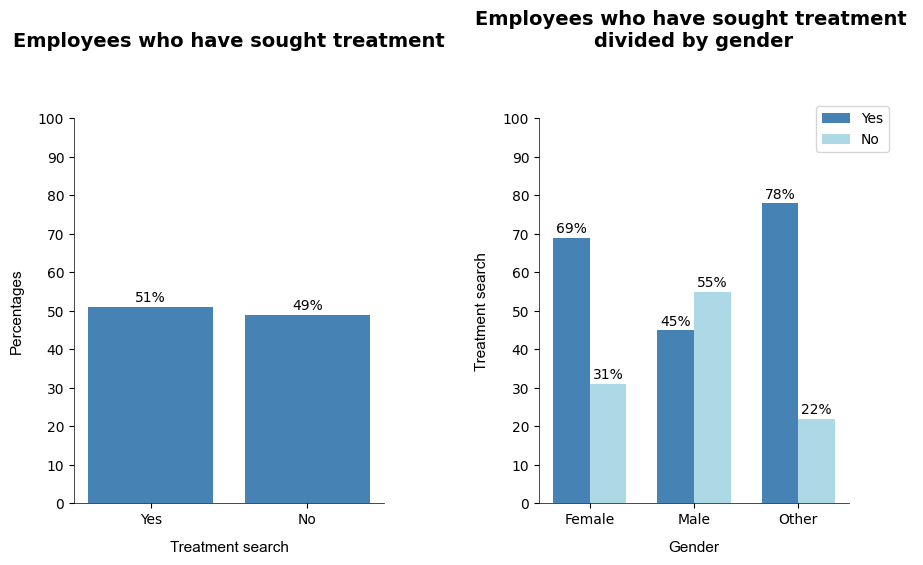

In [183]:
# 1
labels_ans = mental_health_df['treatment'].value_counts().index.to_list()                   # Yes, No
counts_ans = list(map(lambda x: round((x/tot_rows)*100), mental_health_df['treatment'].value_counts()))

# 2
labels_gender = list(mental_health_df['gender'].unique())      # Female, Male, Other

df_gender_treatment = mental_health_df.groupby(['gender', 'treatment'])['treatment'].count().unstack(0)  
yes_perc = percent(df_gender_treatment, 'Yes')
no_perc = percent(df_gender_treatment, 'No')

# The label locations
x = np.arange(len(labels_gender))  
width = 0.35  # the width of the bars

# Plot
fig1, (ax1, ax2) = plt.subplots(1,2,figsize =(10, 5))
fig1.subplots_adjust(wspace=0.5)

ax1.bar(labels_ans, counts_ans, color ='steelblue', label=labels_ans)
ax2.bar(x - width/2, yes_perc, width, color= 'steelblue', label= 'Yes')
ax2.bar(x + width/2, no_perc, width, color= 'lightblue', label ='No')

# Labels, ticks 
ax1.set_xlabel("Treatment search", labelpad= 10.0, fontname="Arial", fontsize=11, fontweight = 'medium')
ax2.set_xlabel("Gender", labelpad= 10.0, fontname="Arial", fontsize=11, fontweight = 'medium')
ax1.set_ylabel("Percentages", labelpad= 10.0, fontname="Arial", fontsize=11, fontweight = 'medium')
ax2.set_ylabel("Treatment search", labelpad= 10.0, fontname="Arial", fontsize=11, fontweight = 'medium')
ax2.set_xticks(x, labels_gender)
ax1.set_yticks(np.arange(0,101, 10))
ax2.set_yticks(np.arange(0,101, 10))

# Percenteges
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate("{}%".format(height), (p.get_x() + p.get_width() / 2, height+ 1.25), ha='center')

for p in ax2.patches:
    height = p.get_height()
    ax2.annotate("{}%".format(height), (p.get_x() + p.get_width() / 2, height+ 1.25), ha='center')

# Title
ax1.set_title('Employees who have sought treatment', fontsize= 14, fontweight= 'heavy', color = 'black', y=1.15, pad=10)
ax2.set_title('Employees who have sought treatment \ndivided by gender', fontsize= 14, fontweight= 'heavy', color = 'black', y=1.15, pad=10)

# Legend
ax2.legend(loc = 'upper right', bbox_to_anchor=(0.65, 0.55, 0.5, 0.5))

# show
plt.show()

The **first plot** shows the answer to the question, *'Do you have a family history of mental illness?'*.

<br>

The **second plot** shows the percentages of respondents who have sought a treatment, given that they came from a family with or without a history in mental illness.

- among who have a family history, the 74 % have sought a treatment while for the ones that don't have a family history, only the 35% have searched treatments.

- this means that peoople who have had cases of mental illness in the family pay more attention to this a topic. Infact, when it comes to mental health/brain health, the family history matters.




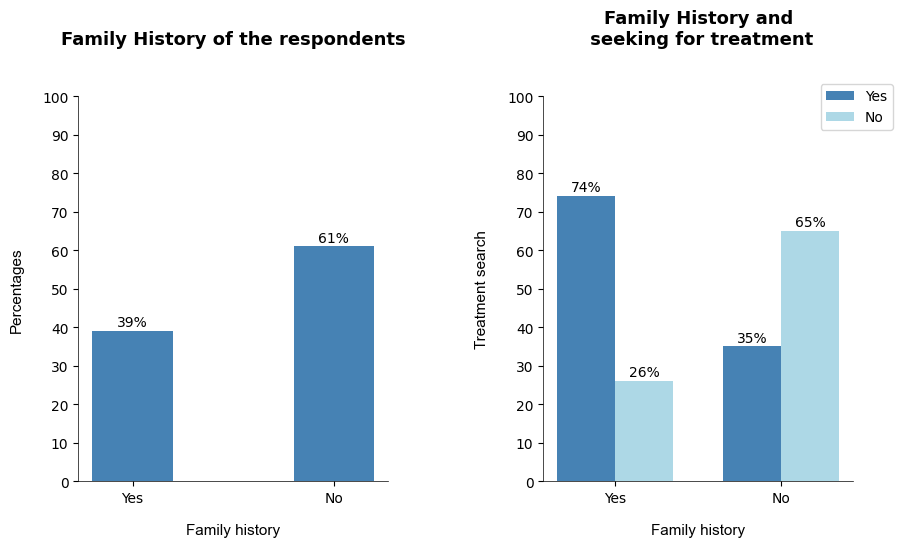

In [184]:
# Data
# 1
labels_ans = list(reversed(mental_health_df['family_history'].value_counts().index.to_list()))                         # Yes, No
reverse_serie = mental_health_df['family_history'].value_counts().reindex(index= mental_health_df['family_history'].value_counts().index[::-1])
counts_ans = list(map(lambda x: round((x/tot_rows)*100), reverse_serie))

# 2
df_family = mental_health_df.groupby(['family_history', 'treatment'])['treatment'].count().unstack(0)
df_family = df_family.reindex(index= df_family.index[::-1], columns=df_family.columns[::-1])               
yes_perc = percent(df_family, 'Yes')
no_perc = percent(df_family, 'No')

# The label locations
x = np.arange(len(labels_ans))  
width = 0.35  

# Plot
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize =(10, 5))
fig1.subplots_adjust(wspace=0.5)

ax1.bar(labels_ans, counts_ans, color ='steelblue',  width = 0.4 , label=labels_ans)
ax2.bar(x - width/2, yes_perc, width, color= 'steelblue', label= 'Yes')
ax2.bar(x + width/2, no_perc, width, color= 'lightblue', label ='No')

# Labels, ticks 
ax1.set_xlabel("Family history", labelpad= 13.0, fontname="Arial", fontsize=11, fontweight = 'medium')
ax2.set_xlabel("Family history", labelpad= 13.0, fontname="Arial", fontsize=11, fontweight = 'medium')
ax1.set_ylabel("Percentages", labelpad= 13.0, fontname="Arial", fontsize=11, fontweight = 'medium')
ax2.set_ylabel("Treatment search", labelpad= 13.0, fontname="Arial", fontsize=11, fontweight = 'medium')
ax2.set_xticks(x, labels_ans)
ax1.set_yticks(np.arange(0,101, 10))
ax2.set_yticks(np.arange(0,101, 10))

# Percentages
for p in ax1.patches:
   height = p.get_height() 
   ax1.annotate("{}%".format(height), (p.get_x() + p.get_width() / 2, height+ 1.25), ha='center')

for p in ax2.patches:
   height = p.get_height() 
   ax2.annotate("{}%".format(round(height)), (p.get_x() + p.get_width() / 2, height+ 1.25), ha='center')

# Titles
ax1.set_title("Family History of the respondents", fontsize= 13, fontweight= 'heavy', color = 'black', y=1.1, pad=10)
ax2.set_title("Family History and\n seeking for treatment", fontsize= 13, fontweight= 'heavy', color = 'black', y=1.1, pad=10)

# Legend
ax2.legend(loc = 'upper right', bbox_to_anchor=(0.65, 0.55, 0.5, 0.5))

# Show
plt.show()

The plot compares the resoponses to these 2 question:
1. *Do you think that discussing a mental health issue with your employer would have negative consequences?*
2. *Do you think that discussing a physical health issue with your employer would have negative consequences?*

We see that the about the 74% of respondents don't think that discussing a physical health issue would have negative consequences, while only 39% have the same thought for the mental health.
Infact we see that there is more indecision among the respondents for the mental health category.

This highlights how differently mental and physical health are seen and treated. Keeping in mind that this survey took place in 2014, we could say that there are still prejudices on mental health issues in our society, because they are "invisible" and more complex to undestrand. Often there is a stigma against those who suffer of mental health issues, because they are considered weird and dangerous. All of these reasons may therefore explain how talking about a mental problem with the employer could be a negative action.

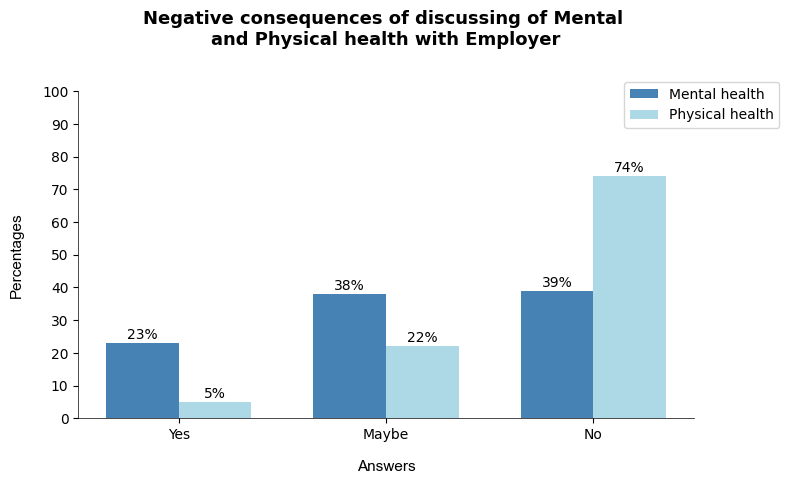

In [193]:
# Data
mhc = mental_health_df['mental_health_consequence'].value_counts().reindex(index= mental_health_df['mental_health_consequence'].value_counts().index[::-1])
phc = mental_health_df['phys_health_consequence'].value_counts().reindex(index= mental_health_df['phys_health_consequence'].value_counts().index[::-1])

labels = mhc.index.to_list()                 
counts_mhc = list(map(lambda x: round((x/tot_rows)*100), mhc))
counts_phc = list(map(lambda x: round((x/tot_rows)*100), phc))
  
# The label locations
x = np.arange(len(labels))  
width = 0.35  

# Plot
fig1, ax1 = plt.subplots(figsize =(8, 5))
ax1.bar(x - width/2, counts_mhc, width, color= 'steelblue', label= 'Mental health')
ax1.bar(x + width/2, counts_phc, width, color= 'lightblue', label ='Physical health')

# Labels, ticks 
ax1.set_xlabel("Answers", labelpad= 13.0, fontname="Arial", fontsize=11, fontweight = 'medium')
ax1.set_ylabel("Percentages", labelpad= 13.0, fontname="Arial", fontsize=11, fontweight = 'medium')
ax1.set_xticks(x, labels)
ax1.set_yticks(np.arange(0,101, 10))

# Percentages
for p in ax1.patches:
   height = p.get_height() 
   ax1.annotate("{}%".format(height), (p.get_x() + p.get_width() / 2, height+ 1.25), ha='center')

# Titles
ax1.set_title("Negative consequences of discussing of Mental \nand Physical health with Employer", fontsize= 13, fontweight= 'heavy', color = 'black', y=1.1, pad=10)

# Legend
ax1.legend(loc = 'upper right', bbox_to_anchor=(0.65, 0.55, 0.5, 0.5))

# Show
plt.tight_layout()
plt.show()

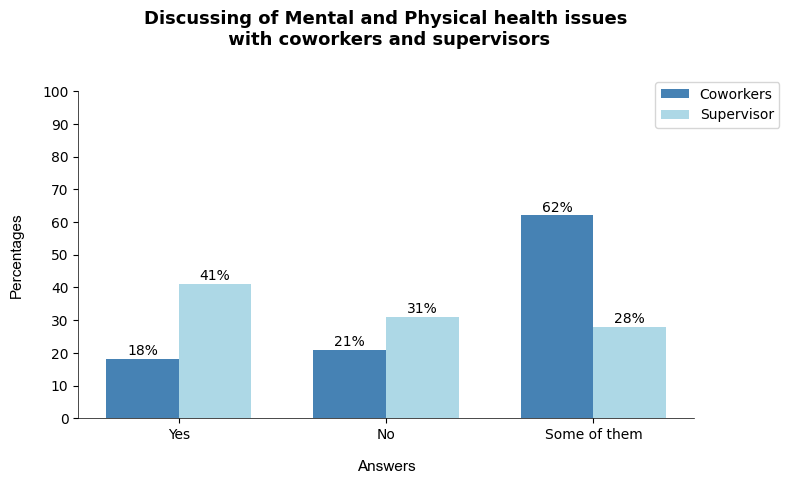

In [202]:
# Data
co = mental_health_df['coworkers'].value_counts().reindex(index= mental_health_df['coworkers'].value_counts().index[::-1])
sup = mental_health_df['supervisor'].value_counts()

labels = co.index.to_list()                 
counts_co = list(map(lambda x: round((x/tot_rows)*100), co))
counts_sup = list(map(lambda x: round((x/tot_rows)*100), sup))
  
# The label locations
x = np.arange(len(labels))  
width = 0.35  

# Plot
fig1, ax1 = plt.subplots(figsize =(8, 5))
ax1.bar(x - width/2, counts_co, width, color= 'steelblue', label= 'Coworkers')
ax1.bar(x + width/2, counts_sup, width, color= 'lightblue', label ='Supervisor')

# Labels, ticks 
ax1.set_xlabel("Answers", labelpad= 13.0, fontname="Arial", fontsize=11, fontweight = 'medium')
ax1.set_ylabel("Percentages", labelpad= 13.0, fontname="Arial", fontsize=11, fontweight = 'medium')
ax1.set_xticks(x, labels)
ax1.set_yticks(np.arange(0,101, 10))

# Percentages
for p in ax1.patches:
   height = p.get_height() 
   ax1.annotate("{}%".format(height), (p.get_x() + p.get_width() / 2, height+ 1.25), ha='center')

# Titles
ax1.set_title("Discussing of Mental and Physical health issues\n with coworkers and supervisors", fontsize= 13, fontweight= 'heavy', color = 'black', y=1.1, pad=10)

# Legend
ax1.legend(loc = 'upper right', bbox_to_anchor=(0.65, 0.55, 0.5, 0.5))

# Show
plt.tight_layout()
plt.show()

In [265]:
temp = pd.concat([mental_health_df['coworkers'], mental_health_df['supervisor']], axis=1)

In [ ]:
sb.catplot(data=tips, x="coworker", y="supervisor", order=["Yes", "No", "Some of them"])


In [ ]:
# Label Encoding the categorical variables

from sklearn.preprocessing import LabelEncoder
object_cols = ['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])